In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm 
import json
import os

import cv2

In [2]:
imgs1 = sorted(os.listdir('/kaggle/input/aisgsla-visual-localisation-challenge/train_images-1/train_images-1'))
imgs2 = sorted(os.listdir('/kaggle/input/aisgsla-visual-localisation-challenge/train_images-2/train_images-2'))
imgs3 = sorted(os.listdir('/kaggle/input/aisgsla-visual-localisation-challenge/train_images-3/train_images-3'))
imgs4 = sorted(os.listdir('/kaggle/input/aisgsla-visual-localisation-challenge/train_images-4/train_images-4'))
print(imgs1[:5])
print(imgs2[:5])
print(len(imgs1) + len(imgs2) + len(imgs3) + len(imgs4))

['180502_025112897_Camera_0.jpg', '180502_025113792_Camera_0.jpg', '180502_025114667_Camera_0.jpg', '180502_025115519_Camera_0.jpg', '180502_025116352_Camera_0.jpg']
['180502_042908860_Camera_0.jpg', '180502_042910326_Camera_0.jpg', '180502_042911574_Camera_0.jpg', '180502_042912665_Camera_0.jpg', '180502_042913653_Camera_0.jpg']
10007


In [3]:
df = pd.read_csv('/kaggle/input/aisgsla-visual-localisation-challenge/train_labels.csv')
df.head()

,Filename,TrajectoryId,Timestamp,Easting,Northing,Height,Roll,Pitch,Yaw
0,180502_025112897_Camera_0.jpg,1,2018-05-02 02:51:12.897,34768.9649,42018.1341,15.2489,153.736106,85.940147,-40.957096
1,180502_025113792_Camera_0.jpg,1,2018-05-02 02:51:13.792,34778.6576,42015.2686,15.3827,151.596473,86.596676,-44.765011
2,180502_025114667_Camera_0.jpg,1,2018-05-02 02:51:14.667,34788.2019,42012.2234,15.5128,164.269207,86.387958,-32.456497
3,180502_025115519_Camera_0.jpg,1,2018-05-02 02:51:15.519,34797.7536,42009.2379,15.6768,171.573787,85.015664,-24.603357
4,180502_025116352_Camera_0.jpg,1,2018-05-02 02:51:16.352,34807.4525,42006.2781,15.9175,178.834049,86.007892,-17.139556


In [4]:
json_path = '/kaggle/input/aisgsla-visual-localisation-challenge/intrinsic_parameters.json'
with open(json_path, 'r') as f:
    f = json.load(f)
f

{'fx': 935.6461822571149,
 'fy': 935.7779926708049,
 'Cx': 1501.8278990534407,
 'Cy': 1016.1713538034546,
 'k1': 0,
 'k2': 0,
 'k3': 0,
 'k4': 0,
 'P1': 0,
 'P2': 0}

In [5]:
pd.read_csv('/kaggle/input/aisgsla-visual-localisation-challenge/submission_format.csv')

,Filename,TrajectoryId,Timestamp,Easting,Northing,Height,Roll,Pitch,Yaw
0,180426_001523864_Camera_0.jpg,5,2018-04-26 00:15:23.864,0.0,0.0,0.0,0.0,0.0,0.0
1,180426_001524766_Camera_0.jpg,5,2018-04-26 00:15:24.766,0.0,0.0,0.0,0.0,0.0,0.0
2,180426_001525604_Camera_0.jpg,5,2018-04-26 00:15:25.604,0.0,0.0,0.0,0.0,0.0,0.0
3,180426_001526397_Camera_0.jpg,5,2018-04-26 00:15:26.397,0.0,0.0,0.0,0.0,0.0,0.0
4,180426_001527166_Camera_0.jpg,5,2018-04-26 00:15:27.166,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2214,180426_014301019_Camera_0.jpg,5,2018-04-26 01:43:01.019,0.0,0.0,0.0,0.0,0.0,0.0
2215,180426_014301810_Camera_0.jpg,5,2018-04-26 01:43:01.810,0.0,0.0,0.0,0.0,0.0,0.0
2216,180426_014302621_Camera_0.jpg,5,2018-04-26 01:43:02.621,0.0,0.0,0.0,0.0,0.0,0.0
2217,180426_014303476_Camera_0.jpg,5,2018-04-26 01:43:03.476,0.0,0.0,0.0,0.0,0.0,0.0


Original Image Shape: (2048, 2869, 3)


100%|██████████| 5/5 [00:00<00:00,  9.77it/s]


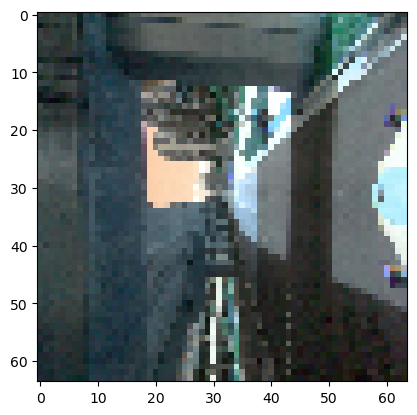

In [6]:
train_path1 = '/kaggle/input/aisgsla-visual-localisation-challenge/train_images-1/train_images-1/'
for i in tqdm(range(len(imgs1[:5]))):
    img = cv2.imread(train_path1 + imgs1[i], cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (64, 64))
    img = img/255.0
plt.imshow(img)

In [7]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

vgg16 = models.vgg16(pretrained=True)
vgg16.eval()

def preprocess_image(image):
    preprocess = transforms.Compose([transforms.Resize((256, 256)), 
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                          std=[0.229, 0.224, 0.225])])
    return preprocess(image).unsqueeze(0)

image = Image.open(train_path1 + imgs1[0])
input_tensor = preprocess_image(image)

with torch.no_grad():
    features = vgg16.features(input_tensor)
features = features.view(-1, 1)
print("Features' Shape : ", features.shape)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:08<00:00, 62.1MB/s]


Features' Shape :  torch.Size([32768, 1])


In [8]:
def get_features(image_path):
    vgg16 = models.vgg16(pretrained=True)
    vgg16.eval()

    image = Image.open(image_path)
    input_tensor = preprocess_image(image)

    with torch.no_grad():
        return vgg16.features(input_tensor).view(-1, 1)

In [9]:
np.array(get_features(train_path1 + imgs1[0])).flatten()

array([1.1248889 , 0.        , 0.        , ..., 0.        , 0.        ,
       0.07214714], dtype=float32)

In [10]:
%%time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


y = df[df.TrajectoryId == 1]

X_train, X_test, y_train, y_test = train_test_split(imgs1, y.Easting, shuffle=True)

train_thresh = len(X_train)
test_thresh = len(X_test)

X_train_features = []
X_test_features = []

for i in tqdm(X_train[:train_thresh]):
    X_train_features.append(np.array(get_features(train_path1 + i)).flatten())
for i in tqdm(X_test[:test_thresh]):
    X_test_features.append(np.array(get_features(train_path1 + i)).flatten())

regressor = LinearRegression()
regressor.fit(X_train_features, y_train[:train_thresh])

y_pred = regressor.predict(X_test_features)
print(f"Mean Squared Error is : {mean_squared_error(y_pred, y_test[:test_thresh])}")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
  0%|          | 0/1049 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 350/350 [13:55<00:00,  2.39s/it]


Mean Squared Error is : 20948.270291112985
CPU times: user 50min 30s, sys: 15min 33s, total: 1h 6min 3s
Wall time: 55min 22s
